<a href="https://colab.research.google.com/github/dakshayani2906/my-python-journey-basics/blob/main/My_1st_AI_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Classification of Handwritten Digits

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

Explanation:

tensorflow: Google's open-source machine learning framework.

keras: TensorFlow's high-level API for building and training neural networks.

mnist: A built-in dataset in Keras containing images of handwritten digits (0-9).

Sequential: A linear stack of layers for building neural network models.

Dense: A fully connected layer in a neural network.

Flatten: A layer to flatten the 2D image data into a 1D vector.

to_categorical: A utility to convert class vectors (integers) to binary class matrices (one-hot encoding).

matplotlib.pyplot: A plotting library for visualizing data.

In [3]:
# Load and Prepare MNIST Dataset

# Load the MNIST dataset, which is split into training and testing sets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Convert the labels to one-hot encoded vectors
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

print("Shape of training images:", train_images.shape)
print("Shape of training labels:", train_labels.shape)
print("Shape of testing images:", test_images.shape)
print("Shape of testing labels:", test_labels.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape of training images: (60000, 28, 28)
Shape of training labels: (60000, 10)
Shape of testing images: (10000, 28, 28)
Shape of testing labels: (10000, 10)


Explanation:

mnist.load_data(): This function downloads the MNIST dataset and returns two tuples: one for the training data (images and labels) and one for the testing data.

Normalization: We divide the pixel values (which range from 0 to 255) by 255.0 to scale them to the range [0, 1]. This helps the neural network learn more effectively.

One-Hot Encoding: The labels are originally integers representing the digits (0, 1, 2, ..., 9). We convert them into a one-hot encoded format. For example, the label 3 becomes [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]. This is a standard practice for multi-class classification.

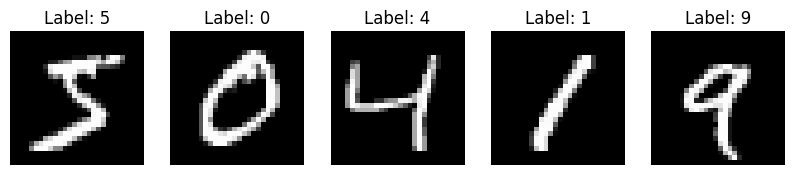

In [4]:
# Display the first few images from the training set
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {tf.argmax(train_labels[i])}")
    plt.axis('off')
plt.show()

Explanation:

This code snippet uses matplotlib to display the first 5 images from the training dataset along with their corresponding labels (decoded from the one-hot encoding using tf.argmax).

In [5]:
# Define the model architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 pixel images into a 1D array (784)
    Dense(128, activation='relu'),   # A fully connected layer with 128 neurons and ReLU activation
    Dense(10, activation='softmax')  # The output layer with 10 neurons (one for each digit) and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Explanation:

Sequential: We are building a sequential model, where layers are added one after another.

Flatten(input_shape=(28, 28)): This layer takes the 28x28 pixel input images and flattens them into a 1D array of 784 pixels. The input_shape argument specifies the shape of the input data for the first layer.

Dense(128, activation='relu'): This is a fully connected (dense) layer with 128 neurons (also called units). The relu (Rectified Linear Unit) is a common activation function that introduces non-linearity into the model, allowing it to learn complex patterns.

Dense(10, activation='softmax'): This is the output layer, which has 10 neurons, corresponding to the 10 possible digits (0-9). The softmax activation function converts the output of each neuron into a probability distribution over the 10 classes. The neuron with the highest probability is the model's prediction.

model.compile(...): This configures the model for training:

optimizer='adam': The Adam optimization algorithm is a popular choice for training neural networks as it adapts the learning rate during training.
loss='categorical_crossentropy': This is the standard loss function for multi-class classification when the labels are one-hot encoded. It measures the difference between the predicted probability distribution and the true distribution.
metrics=['accuracy']: We want to monitor the accuracy of the model during training and evaluation.
model.summary(): This provides a concise overview of the model's architecture, including the number of layers, the output shape of each layer, and the total number of trainable parameters.



In [6]:
# Train the model on the training data
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8618 - loss: 0.4884 - val_accuracy: 0.9539 - val_loss: 0.1580
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9600 - loss: 0.1348 - val_accuracy: 0.9659 - val_loss: 0.1166
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9751 - loss: 0.0856 - val_accuracy: 0.9698 - val_loss: 0.0994
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9812 - loss: 0.0617 - val_accuracy: 0.9737 - val_loss: 0.0884
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9870 - loss: 0.0473 - val_accuracy: 0.9723 - val_loss: 0.0856
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9893 - loss: 0.0362 - val_accuracy: 0.9766 - val_loss: 0.0806
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9924 - loss: 0.0280 - val_accuracy: 0.9693 - val_loss: 0.1080
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9933 - loss: 0.0227 

Explanation:

model.fit(...): This is where the training process happens:
train_images, train_labels: The training data and their corresponding one-hot encoded labels.
epochs=10: The number of times the entire training dataset will be passed through the model. More epochs can lead to better learning but also a risk of overfitting.
batch_size=32: The number of samples that will be processed at each gradient update. Smaller batch sizes can lead to more noisy training but may generalize better.
validation_split=0.2: This tells Keras to use 20% of the training data as a validation set during training. The model's performance on this unseen validation set is monitored to detect overfitting.
history: The fit method returns a History object that contains information about the training process, such as the loss and accuracy at each epoch for both the training and validation sets.


In [7]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.0786
Test Accuracy: 0.9786


Explanation:

model.evaluate(...): This evaluates the trained model on the unseen test data to get an estimate of its generalization performance.
test_images, test_labels: The test data and their corresponding one-hot encoded labels.
verbose=0: Suppresses the output during evaluation.
The function returns the test loss and the test accuracy.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


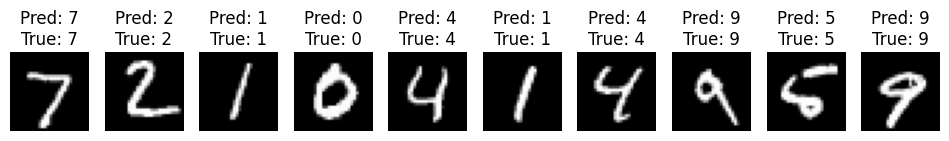

In [8]:
# Make predictions on the first 10 test images
predictions = model.predict(test_images[:10])

# Convert the probability distributions to class labels
predicted_labels = tf.argmax(predictions, axis=1)
true_labels = tf.argmax(test_labels[:10], axis=1)

# Display the images and their predictions
plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {true_labels[i]}")
    plt.axis('off')
plt.show()

Explanation:

model.predict(...): This generates probability distributions over the 10 classes for the given input images.

tf.argmax(predictions, axis=1): This finds the index of the neuron with the highest probability for each prediction, which corresponds to the predicted digit.

The code then displays the first 10 test images along with the model's prediction and the true label.